# **Prerequisite: Loading the Data and Cleaning**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data and print top 5 to confirm
df = pd.read_csv('./Train.csv')
print(f'Data loaded. Shape: {df.shape}')
print(df.head())

Data loaded. Shape: (23524, 13)
  country  year    uniqueid bank_account location_type cellphone_access  \
0   Kenya  2018  uniqueid_1          Yes         Rural              Yes   
1   Kenya  2018  uniqueid_2           No         Rural               No   
2   Kenya  2018  uniqueid_3          Yes         Urban              Yes   
3   Kenya  2018  uniqueid_4           No         Rural              Yes   
4   Kenya  2018  uniqueid_5           No         Urban               No   

   household_size  age_of_respondent gender_of_respondent  \
0               3                 24               Female   
1               5                 70               Female   
2               5                 26                 Male   
3               5                 34               Female   
4               8                 26                 Male   

  relationship_with_head           marital_status  \
0                 Spouse  Married/Living together   
1      Head of Household                  Wi

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

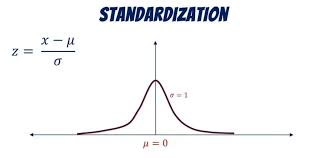


In [5]:
# The dataset has "Dont know", "Refuse to answer" which are implicit missing values, so we convert them to actual NaNs.
missing_labels = ['Dont know', 'Other/Dont know/RTA', 'Dont Know/Refuse to answer']
df.replace(missing_labels, np.nan, inplace=True)

# Fill NaNs: Use Mode (most frequent data) for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

# Drop unique IDs (not useful to us) and the Target 'bank_account'
# We keep 'bank_account' in a separate variable
y_labels = df['bank_account']
X_raw = df.drop(columns=['uniqueid', 'bank_account', 'country', 'year'])

# Convert text columns to integers
X_numeric = pd.get_dummies(X_raw, drop_first=True)
X = X_numeric.values.astype(float)

#STANDARDIZE
# Formula from image: z = (x - mean) / std_dev
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

standardized_data = (X - mean) / std_dev

# Display first 5 rows
print("Data Shape:", standardized_data.shape)
print(standardized_data[:5])

Data Shape: (23524, 25)
[[-0.35800673 -0.89618796 -0.80006449  0.58972136 -0.83377399 -1.0954195
  -0.09023649 -0.17095748 -0.22000008  1.61492274  1.08942878 -0.7167102
  -0.36068301 -1.09495008  2.13786051 -0.22743789 -0.18799403 -0.1293308
  -0.21668775 -0.10301132 -0.55875812 -0.16547961 -0.21936218 -0.34691573
   1.60758715]
 [ 0.53983446  1.88827897 -0.80006449 -1.69571609 -0.83377399  0.91289227
  -0.09023649 -0.17095748 -0.22000008 -0.61922467 -0.91791223 -0.7167102
   2.77251759 -1.09495008 -0.46775737 -0.22743789 -0.18799403 -0.1293308
  -0.21668775  9.70767049 -0.55875812 -0.16547961 -0.21936218 -0.34691573
  -0.62205026]
 [ 0.53983446 -0.77512418  1.24989924  0.58972136  1.19936578 -1.0954195
  -0.09023649  5.84940757 -0.22000008 -0.61922467 -0.91791223  1.39526409
  -0.36068301 -1.09495008 -0.46775737 -0.22743789  5.31931793 -0.1293308
  -0.21668775 -0.10301132 -0.55875812 -0.16547961 -0.21936218 -0.34691573
   1.60758715]
 [ 0.53983446 -0.29086906 -0.80006449  0.58972136 

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [6]:
# Step 3: Calculate the Covariance Matrix
n_samples = standardized_data.shape[0]

# Math: (Transposed Matrix  Dot-Product  Matrix) / (n - 1)
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)

print("Covariance Matrix Shape:", cov_matrix.shape)
print(cov_matrix[:5, :5])

Covariance Matrix Shape: (25, 25)
[[ 1.00004251 -0.12973466 -0.25729463  0.09136357  0.0145767 ]
 [-0.12973466  1.00004251 -0.047375   -0.10361561  0.0127451 ]
 [-0.25729463 -0.047375    1.00004251 -0.08524188  0.01292493]
 [ 0.09136357 -0.10361561 -0.08524188  1.00004251  0.10237392]
 [ 0.0145767   0.0127451   0.01292493  0.10237392  1.00004251]]


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [7]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("First 5 Eigenvalues:", eigenvalues[:5])
print("Eigenvectors Shape:", eigenvectors.shape)

First 5 Eigenvalues: [2.5278665  2.33940581 1.91640496 1.69902609 1.47409173]
Eigenvectors Shape: (25, 25)


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [8]:
# Step 5: Sort Principal Components
# Get indices that would sort the eigenvalues high-to-low
sorted_indices = np.argsort(eigenvalues)[::-1]

# Reorder both eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Print the top eigenvalue
print("Top Eigenvalue:", sorted_eigenvalues[0])
print("Sorted Eigenvectors (First 5 rows of PC1):\n", sorted_eigenvectors[:5, 0])

Top Eigenvalue: 2.5278665012239014
Sorted Eigenvectors (First 5 rows of PC1):
 [-0.25821569  0.39079901  0.04389043 -0.04149681  0.23089652]


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [9]:
# Step 6: Project Data onto Principal Components
num_components = 2  # We choose 2 dimensions for the plot

# Select the top 2 eigenvectors (The "Projection Matrix")
projection_matrix = sorted_eigenvectors[:, :num_components]

# Project: Standardized Data (dot) Projection Matrix
reduced_data = np.dot(standardized_data, projection_matrix)

print(reduced_data[:5])

[[-2.13978312  0.61955179]
 [ 3.7532119   1.14403311]
 [-0.77714534 -3.22266969]
 [ 0.24291066  1.25710984]
 [-0.75767347 -1.11299901]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [10]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')
print("First 5 rows of PCA data:\n", reduced_data[:5])

Reduced Data Shape: (23524, 2)
First 5 rows of PCA data:
 [[-2.13978312  0.61955179]
 [ 3.7532119   1.14403311]
 [-0.77714534 -3.22266969]
 [ 0.24291066  1.25710984]
 [-0.75767347 -1.11299901]]


### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

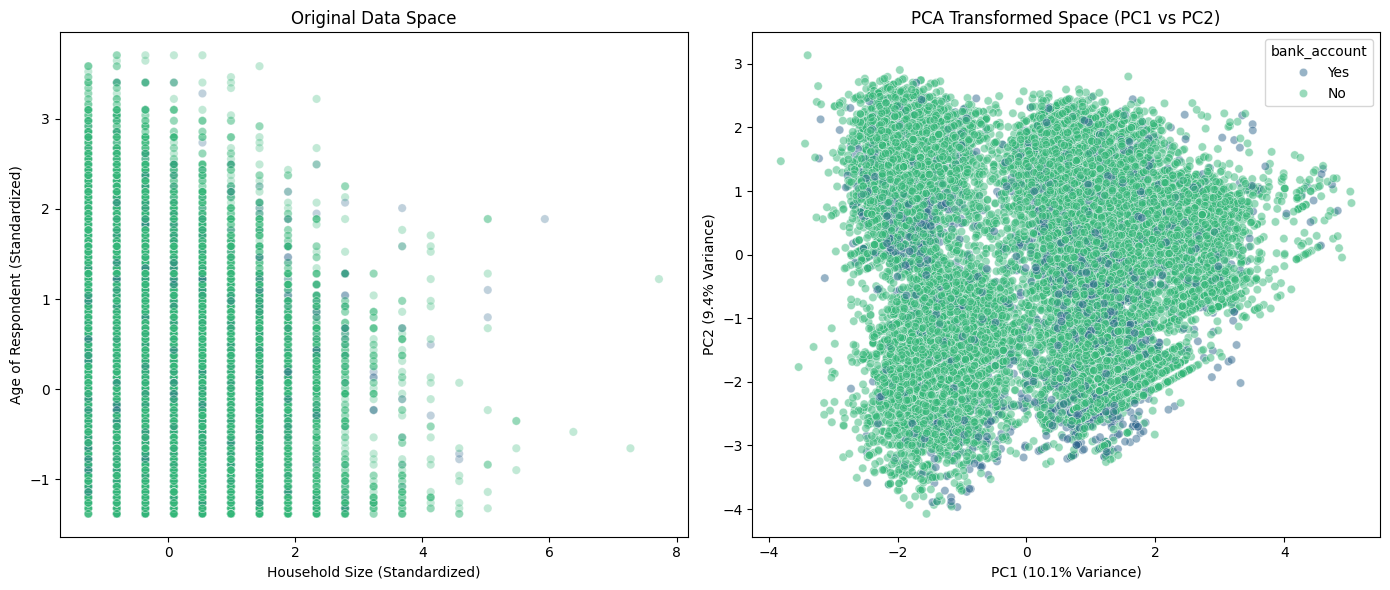

In [11]:
plt.figure(figsize=(14, 6))

#Plot 1: Original Data
# We know Column 0 is Household Size and Column 1 is Age based on X_numeric.columns
plt.subplot(1, 2, 1)
sns.scatterplot(x=standardized_data[:, 0], y=standardized_data[:, 1],
                hue=y_labels, palette='viridis', alpha=0.3, legend=False)
plt.title('Original Data Space')
plt.xlabel('Household Size (Standardized)')
plt.ylabel('Age of Respondent (Standardized)')

# Plot 2: Reduced Data (PCA)
plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1],
                hue=y_labels, palette='viridis', alpha=0.5)
plt.title('PCA Transformed Space (PC1 vs PC2)')
plt.xlabel(f'PC1 ({sorted_eigenvalues[0]/sum(sorted_eigenvalues)*100:.1f}% Variance)')
plt.ylabel(f'PC2 ({sorted_eigenvalues[1]/sum(sorted_eigenvalues)*100:.1f}% Variance)')

plt.tight_layout()
plt.show()

**Analysis of Visualization:**

**Original Space (Left):** You’ll notice the data looks like a checkerboard or grid. This happens because "Household Size" and "Age" are whole numbers, you can't be 24.5 years old or have 3.5 people in your family. Because of this, the dots pile up on top of each other at exact spots rather than spreading out smoothly.

**PCA Space (Right):** The PCA plot looks completely different, the data has been stretched out into distinct diagonal lines. This proves the algorithm worked! It took that rigid grid and rotated it to find where the data varies the most.

**Interpretation:** We got groups of people sorted by categorical things like their Job or Education. Since we turned categories into 0s and 1s, PCA organized the data into these bands. The fact that the "Yes" (Bank Account) and "No" dots are all mixed together tells us something important: there is no simple rule for who has a bank account. It’s a complex mix of age, job, and family size, not just one simple factor.

Explained Variance Ratio of Top 5 Components: [0.10111036 0.09357225 0.07665294 0.06795815 0.05896116]
To capture 90.0% of the information, you need 18 components.


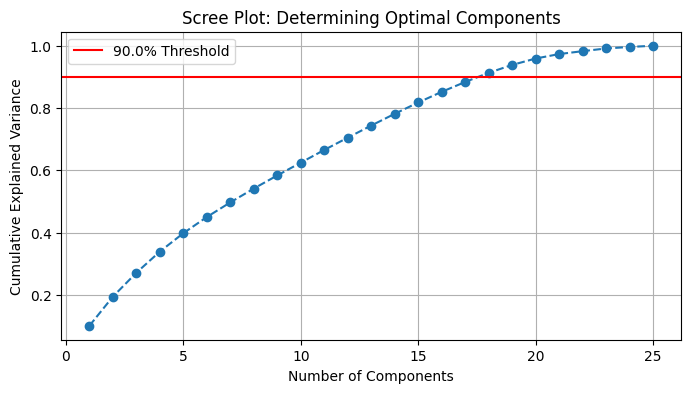

In [12]:
#Dynamic Selection of Principal Components

# 1. Calculate Explained Variance Ratio
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance

# 2. Calculate Cumulative Variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# 3. Dynamic Selection: Find k components to reach 90% variance
threshold = 0.90
# np.argmax returns the first index where the condition is True
k_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Explained Variance Ratio of Top 5 Components: {explained_variance_ratio[:5]}")
print(f"To capture {threshold*100}% of the information, you need {k_components} components.")

#A Scree Plot for visualization
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='-', label=f'{threshold*100}% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: Determining Optimal Components')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
#Benchmarking / Optimization
import time

# We will measure how long PCA takes to run
start_time = time.time()

# RE-RUNNING THE FULL PCA PIPELINE
# 1. Standardize
mean_bench = np.mean(X, axis=0)
std_bench = np.std(X, axis=0)
X_std_bench = (X - mean_bench) / std_bench

# 2. Covariance
cov_bench = np.dot(X_std_bench.T, X_std_bench) / (X_std_bench.shape[0] - 1)

# 3. Eigendecomposition
vals_bench, vecs_bench = np.linalg.eig(cov_bench)

# 4. Sort
idx_bench = np.argsort(vals_bench)[::-1]
vecs_sorted_bench = vecs_bench[:, idx_bench]

# 5. Project
projected_bench = np.dot(X_std_bench, vecs_sorted_bench[:, :2])

end_time = time.time()

print(f"Optimization Test: PCA Pipeline executed in {end_time - start_time:.4f} seconds.")
print("The implementation uses NumPy vectorization (dot products), which is significantly faster than Python loops.")

Optimization Test: PCA Pipeline executed in 0.0080 seconds.
The implementation uses NumPy vectorization (dot products), which is significantly faster than Python loops.
